# Pymaceuticals Inc.
---

### Analysis

- analysis
 

In [1]:
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# setup DataFrames
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_study_df = study_results.merge(mouse_metadata, on="Mouse ID")
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Check number of unique mice.
number_of_mice = len(mouse_study_df["Mouse ID"].unique())
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# create a bool series to find duplicate rows
not_unique_mice_filter = mouse_study_df.duplicated(["Mouse ID", "Timepoint"], keep=False)
# show only the unique 'Mouse ID' after filtering the DataFrame to only duplicate rows
mouse_study_df[not_unique_mice_filter]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Get all the data for the duplicate mouse ID.

duplicate_mouse = mouse_study_df[mouse_study_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_study_df = mouse_study_df[mouse_study_df["Mouse ID"] != "g989"].reset_index(drop=True)
clean_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Number of mice in the clean DataFrame.
# should be 1 less than original unique mouse count
number_of_mice_clean = len(clean_mouse_study_df["Mouse ID"].unique())
number_of_mice_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# use chained 'groupby' and 'agg' to create summary DataFrame
regimen_summary_df = clean_mouse_study_df.groupby("Drug Regimen")\
                                         .agg(Mean=("Tumor Volume (mm3)", "mean"),
                                              Median=("Tumor Volume (mm3)", "median"),
                                              Variance=("Tumor Volume (mm3)", "var"),
                                              Std_Dev=("Tumor Volume (mm3)", "std"),
                                              SEM=("Tumor Volume (mm3)", "sem"))
regimen_summary_df

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

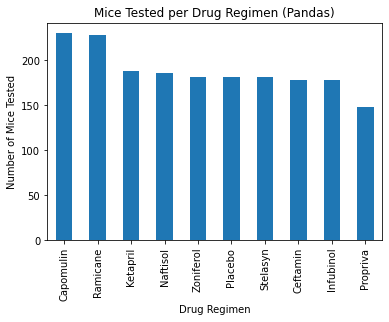

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_chart_data = clean_mouse_study_df.groupby("Drug Regimen")\
                                     .agg({"Timepoint": "count"})\
                                     .rename(columns={"Timepoint": "Number of Mice Tested"})\
                                     .sort_values("Number of Mice Tested", ascending=False)
pands_bar_plot = bar_chart_data.plot(kind="bar", y="Number of Mice Tested", legend=False, title="Mice Tested per Drug Regimen (Pandas)")
# pandas 1.0.5 (PythonData) does not have `xlabel` and `ylabel` as part of .plot() kwargs, this is added in version 1.1.0
pands_bar_plot = pands_bar_plot.set(xlabel="Drug Regimen", ylabel="Number of Mice Tested")

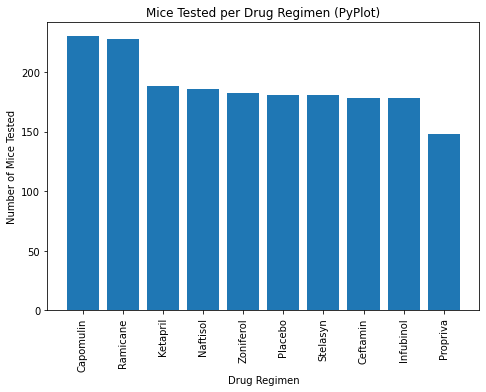

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mpl_bar_plot = plt.figure(1)
ax_bar = mpl_bar_plot.add_axes([0, 0, 1, 1])
ax_bar.bar(bar_chart_data.index, bar_chart_data["Number of Mice Tested"])
ax_bar.set(xlabel="Drug Regimen", ylabel="Number of Mice Tested", title="Mice Tested per Drug Regimen (PyPlot)")
ax_bar.tick_params(axis='x', labelrotation=90)

In [11]:
# Female vs Male data
# this data uses the clean mouse study where the single duplicate Female mouse (ID=g989) has been removed
by_sex_mice_df = clean_mouse_study_df[~clean_mouse_study_df.duplicated("Mouse ID")]
by_sex_mice_df = by_sex_mice_df["Sex"]
by_sex_series = by_sex_mice_df.value_counts()
by_sex_series

Male      125
Female    123
Name: Sex, dtype: int64

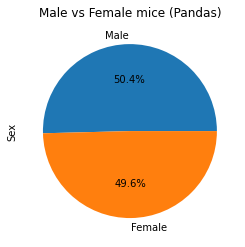

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fig, ax = plt.subplots(facecolor='white')  # force white background so text can be seen in dark VS Code
by_sex_series.plot.pie(title="Male vs Female mice (Pandas)", autopct='%.1f%%')
plt.show()


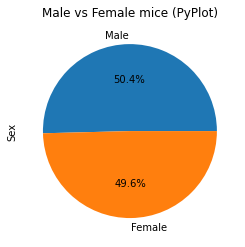

In [25]:
# Male vs Female plot using PyPlot
pie_fig, pie_ax = plt.subplots()
pie_fig.patch.set_facecolor('white')  # background color
pie_ax.pie(by_sex_series, labels=by_sex_series.index, autopct='%.1f%%')
pie_ax.set(title="Male vs Female mice (PyPlot)", ylabel="Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

filtered_regimens_clean = clean_mouse_study_df[clean_mouse_study_df["Drug Regimen"].isin(("Capomulin", "Ramicane", "Infubinol", "Ceftamin"))]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_mouse_df = filtered_regimens_clean.groupby("Mouse ID")\
                                                 .agg({"Timepoint": 'last',
                                                       "Tumor Volume (mm3)": 'last',
                                                       "Drug Regimen": 'last'})\
                                                 .reset_index(drop=False)
last_timepoint_mouse_df.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane


In [15]:
# create lists of treatments
selected_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

def extract_tumor_volume_list(drug_regimen: str) -> List[float]:
    """ Create a list of Tumor Volumes for a given `drug_regimen` """
    return last_timepoint_mouse_df[last_timepoint_mouse_df["Drug Regimen"] == drug_regimen]["Tumor Volume (mm3)"].to_list()

# create dict of lists with tumor volume data for each of the above treatment
tumor_volume_data = {"Capomulin": extract_tumor_volume_list("Capomulin"),
                     "Ramicane": extract_tumor_volume_list("Ramicane"),
                     "Infubinol": extract_tumor_volume_list("Infubinol"),
                     "Ceftamin": extract_tumor_volume_list("Ceftamin")}

In [16]:
# create DataFrame from tumor volume dictionary where columns are the drug regimen
# how to create DataFrame with unequal length of lists in dictionary:
#   https://stackoverflow.com/questions/19736080/creating-dataframe-from-a-dictionary-where-entries-have-different-lengths
tumor_volume_df = pd.DataFrame.from_dict(tumor_volume_data, orient='index').transpose()

# get statistics for each drug regimen
tumor_volume_statistics = tumor_volume_df.describe()
tumor_volume_statistics

,Capomulin,Ramicane,Infubinol,Ceftamin
count,25.000000,25.000000,25.000000,25.000000
mean,36.667568,36.191390,58.178246,57.753977
std,5.715188,5.671539,8.602957,8.365568
min,23.343598,22.050126,36.321346,45.000000
25%,32.377357,31.560470,54.048608,48.722078
50%,38.125164,36.561652,60.165180,59.851956
75%,40.159220,40.659006,65.525743,64.299830
max,47.685963,45.220869,72.226731,68.923185


In [17]:
# calculate number and values of outliers for each drug in out selected treatments using IQR
for drug in selected_treatments:
    list_of_tumor_volumes = tumor_volume_data[drug]
    outliers_count = 0
    outliers_values = []
    drug_25percent = tumor_volume_statistics.loc["25%", drug]
    drug_75percent = tumor_volume_statistics.loc["75%", drug]
    # IQR = Q3-Q1
    iqr = drug_75percent - drug_25percent
    for volume in list_of_tumor_volumes:
        # outliers are less than Q1-(1.5 × IQR) or greater than Q3+(1.5 × IQR)
        if not (drug_25percent - 1.5 * iqr ) < volume < (drug_75percent + 1.5 * iqr):
            # volume is an outlier:
            outliers_count += 1
            outliers_values.append(volume)
    print(f"{drug}:\tIQR= {iqr:.4f},\toutliers: Count= {outliers_count}, Values= {outliers_values}")

Capomulin:	IQR= 7.7819,	outliers: Count= 0, Values= []
Ramicane:	IQR= 9.0985,	outliers: Count= 0, Values= []
Infubinol:	IQR= 11.4771,	outliers: Count= 1, Values= [36.321345799999996]
Ceftamin:	IQR= 15.5778,	outliers: Count= 0, Values= []


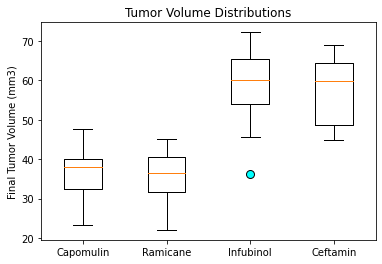

In [27]:
# Box Plot for distribution of the tumor volume for each treatment group.

box_fig, box_ax = plt.subplots()
# matplotlib does not like DataFrame even though all columns have the same length, convert to np array
# customize: https://matplotlib.org/stable/gallery/statistics/boxplot.html
outlier_customize = {'markerfacecolor':'cyan', 'markersize':8}
box_ax.boxplot(tumor_volume_df.to_numpy(), flierprops=outlier_customize)
box_ax.set(title="Tumor Volume Distributions", ylabel="Final Tumor Volume (mm3)", xticklabels=selected_treatments)
plt.show()

## Line and Scatter Plots

In [19]:
# get list of unique Mouse ID values for 'Capomuli'
capomulin_mice = clean_mouse_study_df[clean_mouse_study_df["Drug Regimen"] == "Capomulin"]
print(sorted(capomulin_mice["Mouse ID"].unique()))

['b128', 'b742', 'f966', 'g288', 'g316', 'i557', 'i738', 'j119', 'j246', 'l509', 'l897', 'm601', 'm957', 'r157', 'r554', 'r944', 's185', 's710', 't565', 'u364', 'v923', 'w150', 'w914', 'x401', 'y793']


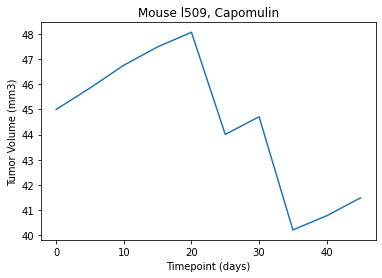

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# mouse will be: l509
single_mouse_plot = capomulin_mice.loc[capomulin_mice["Mouse ID"] == "l509"].plot.line(x="Timepoint",
                                                                                       y="Tumor Volume (mm3)",
                                                                                       legend=False,
                                                                                       title="Mouse l509, Capomulin")
single_mouse_plot = single_mouse_plot.set(xlabel="Timepoint (days)", ylabel="Tumor Volume (mm3)")

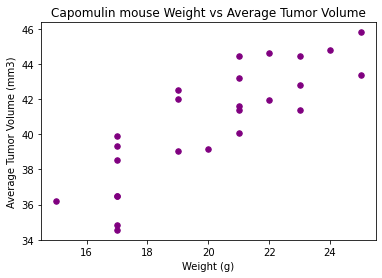

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_mice_average_weight = capomulin_mice.groupby(["Mouse ID"])\
                                              .agg({"Tumor Volume (mm3)": "mean",
                                                    "Weight (g)": "first"})\
                                              .rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
mice_scatter_plot = capomulin_mice_average_weight.plot.scatter(x="Weight (g)",
                                                               y="Average Tumor Volume (mm3)",
                                                               title="Capomulin mouse Weight vs Average Tumor Volume",
                                                               c='purple', s=30)

## Correlation and Regression

In [22]:
# calculate correlation and linear regression for 'weight' vs 'average tumor volume'
mouse_x_vals = capomulin_mice_average_weight["Weight (g)"]
mouse_y_vals = capomulin_mice_average_weight["Average Tumor Volume (mm3)"]

correlation = mouse_x_vals.corr(mouse_y_vals)
print(f"Correlation between weight and average tumor volume is {correlation:.3f}")
linear_regression = st.linregress(mouse_x_vals, mouse_y_vals)
print(f"Linear Regression equation: y = {linear_regression.slope:.3f} x + {linear_regression.intercept:.3f}")

Correlation between weight and average tumor volume is 0.842
Linear Regression equation: y = 0.954 x + 21.552


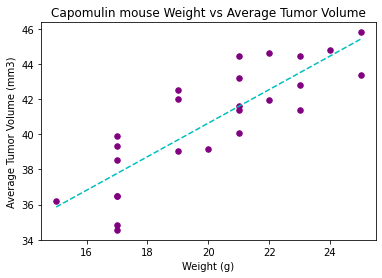

In [23]:
# use capomulin_mice_average_weight data again, but with matplotlib to add Linear Regression equation
mouse_scatter_fig, mouse_scatter_ax = plt.subplots()
mouse_scatter_ax.scatter(x=capomulin_mice_average_weight["Weight (g)"],
                         y=capomulin_mice_average_weight["Average Tumor Volume (mm3)"], color='purple', s=30)
mouse_scatter_ax.set(title="Capomulin mouse Weight vs Average Tumor Volume",
                     xlabel="Weight (g)",
                     ylabel="Average Tumor Volume (mm3)")
ls = np.linspace(capomulin_mice_average_weight["Weight (g)"].min(), capomulin_mice_average_weight["Weight (g)"].max(), 50)
mouse_scatter_ax.plot(ls, 0.954*ls + 21.552, '--c')
plt.show()